In [90]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from pandas import read_csv
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
np.random.seed(7)
data = pd.read_csv('beacon.csv',engine='python')
data.head(5)

,steps,x,y,Beacon1,Beacon2,Beacon3,Beacon4,Beacon5,Beacon6,Beacon7
0,1,5.0,6.5,-66,-67,-81,-77,-87,-85,-82
1,2,5.0,6.6,-71,-80,-73,-64,-61,-73,-82
2,3,5.0,6.7,-72,-68,-79,-78,-78,-75,-67
3,4,5.0,6.8,-84,-71,-72,-69,-65,-76,-72
4,5,5.0,6.9,-74,-87,-74,-67,-65,-70,-73


In [14]:
def l2_dist(p1, p2):
    x1,y1 = p1
    x2,y2 = p2
    x1, y1 = np.array(x1), np.array(y1)
    x2, y2 = np.array(x2), np.array(y2)
    dx = x1 - x2
    dy = y1 - y2
    dx = dx ** 2
    dy = dy ** 2
    dists = dx + dy
    dists = np.sqrt(dists)
    return np.mean(dists), dists

In [15]:
beacon_values = data.iloc[:,3:]
beacon_values

,Beacon1,Beacon2,Beacon3,Beacon4,Beacon5,Beacon6,Beacon7
0,-66,-67,-81,-77,-87,-85,-82
1,-71,-80,-73,-64,-61,-73,-82
2,-72,-68,-79,-78,-78,-75,-67
3,-84,-71,-72,-69,-65,-76,-72
4,-74,-87,-74,-67,-65,-70,-73
...,...,...,...,...,...,...,...
1911,-79,-80,-84,-83,-72,-59,-62
1912,-76,-79,-81,-90,-77,-58,-61
1913,-75,-84,-74,-88,-80,-60,-58
1914,-83,-87,-86,-84,-81,-65,-58


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

beacon_values = data.iloc[:,3:].values
print(data.shape)
from sklearn.model_selection import train_test_split
X = data.iloc[:,3:]
# print(X)
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaler = scaler.fit_transform(X)
y=data.iloc[:,1:3]
print(X_scaler)
coordinates=data.iloc[:,1:3].values 

X_train, X_test, Y_train, Y_test = train_test_split(X, coordinates, test_size=0.2, random_state=42)


(1916, 10)
[[0.65384615 0.75       0.38297872 ... 0.22       0.29545455 0.32075472]
 [0.55769231 0.45454545 0.55319149 ... 0.74       0.56818182 0.32075472]
 [0.53846154 0.72727273 0.42553191 ... 0.4        0.52272727 0.60377358]
 ...
 [0.48076923 0.36363636 0.53191489 ... 0.36       0.86363636 0.77358491]
 [0.32692308 0.29545455 0.27659574 ... 0.34       0.75       0.77358491]
 [0.53846154 0.29545455 0.4893617  ... 0.34       0.95454545 0.62264151]]


In [38]:
X_train.shape
Y_train.shape

(1532, 2)

In [39]:
X_test.shape

(384, 1, 7)

In [41]:
X_train.shape

(1532, 1, 7)

In [37]:
X_train = X_train.values

X_test = X_test.values
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

X_test =  X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [43]:
import keras 
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.layers import LSTM, Input
from keras.models import Model


#def create_deep(inp_dim):
    #seed = 7
    #np.random.seed(seed)
model = Sequential()
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 7)))
model.add(BatchNormalization())
model.add(LSTM(units = 50))
model.add(Dense(2, activation='relu'))
    # Compile model
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss='mse', optimizer=adam, metrics=['mse'])
#eturn model

es = EarlyStopping(monitor='val_loss', patience=600, verbose=2, mode='auto', restore_best_weights=True)
#model = create_deep(X_train.shape[1])
hist = model.fit(x = X_train, y = Y_train, validation_data = (X_test,Y_test), epochs=200, batch_size=12,  verbose=2, callbacks = [es])

W0114 23:31:13.484657 22036 deprecation.py:323] From C:\Users\poulr\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0114 23:31:15.499253 22036 deprecation_wrapper.py:119] From C:\Users\poulr\Anaconda32\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 1532 samples, validate on 384 samples
Epoch 1/200
 - 6s - loss: 21.0711 - mean_squared_error: 21.0711 - val_loss: 9.8314 - val_mean_squared_error: 9.8314
Epoch 2/200
 - 1s - loss: 9.2411 - mean_squared_error: 9.2411 - val_loss: 9.9113 - val_mean_squared_error: 9.9113
Epoch 3/200
 - 1s - loss: 9.1647 - mean_squared_error: 9.1647 - val_loss: 10.1003 - val_mean_squared_error: 10.1003
Epoch 4/200
 - 1s - loss: 9.2339 - mean_squared_error: 9.2339 - val_loss: 10.3722 - val_mean_squared_error: 10.3722
Epoch 5/200
 - 1s - loss: 9.2460 - mean_squared_error: 9.2460 - val_loss: 9.1634 - val_mean_squared_error: 9.1634
Epoch 6/200
 - 1s - loss: 9.2661 - mean_squared_error: 9.2661 - val_loss: 10.8167 - val_mean_squared_error: 10.8167
Epoch 7/200
 - 1s - loss: 9.1911 - mean_squared_error: 9.1911 - val_loss: 9.5423 - val_mean_squared_error: 9.5423
Epoch 8/200
 - 1s - loss: 9.1809 - mean_squared_error: 9.1809 - val_loss: 9.9951 - val_mean_squared_error: 9.9951
Epoch 9/200
 - 1s - loss: 9.2313 

Epoch 72/200
 - 1s - loss: 9.1968 - mean_squared_error: 9.1968 - val_loss: 8.6553 - val_mean_squared_error: 8.6553
Epoch 73/200
 - 1s - loss: 9.2334 - mean_squared_error: 9.2334 - val_loss: 8.8527 - val_mean_squared_error: 8.8527
Epoch 74/200
 - 1s - loss: 9.1967 - mean_squared_error: 9.1967 - val_loss: 8.6593 - val_mean_squared_error: 8.6593
Epoch 75/200
 - 1s - loss: 9.1388 - mean_squared_error: 9.1388 - val_loss: 8.7254 - val_mean_squared_error: 8.7254
Epoch 76/200
 - 1s - loss: 9.3037 - mean_squared_error: 9.3037 - val_loss: 9.2276 - val_mean_squared_error: 9.2276
Epoch 77/200
 - 1s - loss: 9.2147 - mean_squared_error: 9.2147 - val_loss: 8.6527 - val_mean_squared_error: 8.6527
Epoch 78/200
 - 1s - loss: 9.1088 - mean_squared_error: 9.1088 - val_loss: 8.7022 - val_mean_squared_error: 8.7022
Epoch 79/200
 - 1s - loss: 9.1910 - mean_squared_error: 9.1910 - val_loss: 8.7215 - val_mean_squared_error: 8.7215
Epoch 80/200
 - 1s - loss: 9.3799 - mean_squared_error: 9.3799 - val_loss: 8.637

Epoch 143/200
 - 2s - loss: 9.0629 - mean_squared_error: 9.0629 - val_loss: 8.6372 - val_mean_squared_error: 8.6372
Epoch 144/200
 - 2s - loss: 9.1640 - mean_squared_error: 9.1640 - val_loss: 8.7013 - val_mean_squared_error: 8.7013
Epoch 145/200
 - 1s - loss: 9.1009 - mean_squared_error: 9.1009 - val_loss: 8.6440 - val_mean_squared_error: 8.6440
Epoch 146/200
 - 1s - loss: 9.2645 - mean_squared_error: 9.2645 - val_loss: 8.6859 - val_mean_squared_error: 8.6859
Epoch 147/200
 - 1s - loss: 9.1723 - mean_squared_error: 9.1723 - val_loss: 8.7836 - val_mean_squared_error: 8.7836
Epoch 148/200
 - 1s - loss: 9.1355 - mean_squared_error: 9.1355 - val_loss: 8.6630 - val_mean_squared_error: 8.6630
Epoch 149/200
 - 1s - loss: 9.1498 - mean_squared_error: 9.1498 - val_loss: 9.1116 - val_mean_squared_error: 9.1116
Epoch 150/200
 - 1s - loss: 9.3278 - mean_squared_error: 9.3278 - val_loss: 8.8180 - val_mean_squared_error: 8.8180
Epoch 151/200
 - 1s - loss: 9.0144 - mean_squared_error: 9.0144 - val_lo

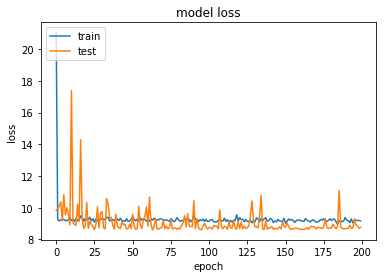

In [44]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:

preds = model.predict(X_test)
l2dists_mean, l2dists = l2_dist((preds[:, 0], preds[:, 1]), (Y_test[:, 0] , Y_test[:, 0]))
print(l2dists_mean)

3.9912631897989876


In [1]:
preds

NameError: name 'preds' is not defined

In [46]:
preds = model.predict(X_test)

preds.shape

(384, 2)

In [47]:
Y_test.shape

(384, 2)

In [87]:
from sklearn.model_selection import KFold 
import keras 
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.layers import LSTM, Input
from keras.models import Model

scores = []
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    X_train = X_train.values
    X_test = X_test.values
    
    a_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    a_test =  X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
    model = Sequential()
    model.add(LSTM(units = 100, return_sequences = True, input_shape = (a_train.shape[1], 7)))
    model.add(BatchNormalization())
    model.add(LSTM(units = 50))
    model.add(Dense(2, activation='relu'))
    # Compile model
    #X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    model.compile(loss='mse', optimizer='adam')
    model.fit(a_train, y_train, epochs=10, batch_size=32, validation_split = 0.2, verbose=2)
    ron =model.predict(a_test)
    lol = pd.DataFrame(ron)
    lol = lol.rename(columns={0:'a',1:'b'})
    actual_1=pd.DataFrame(np.array(y_test).T)
    actual = actual_1.T
    actual = actual.rename(columns={0:'x',1:'y'})
    actual['a']=lol['a']
    actual['b'] = lol['b']
    actual['distance']=np.sqrt((actual['x']-actual['a'])**2+(actual['y']-actual['b'])**2)
    mean = actual['distance'].mean()
    scores.append(mean)

C:\Users\poulr\Anaconda32\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Train Index:  [ 192  193  194 ... 1913 1914 1915] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191]
Train on 1379 samples, validate on 345 samples
Epoch 1/10
 - 22s - loss: 26.9383 - val_loss: 23.8550
Epoch 2/10
 - 1s - loss: 15.2586 - val_loss: 11.7614
E

Epoch 2/10
 - 1s - loss: 16.5400 - val_loss: 12.0699
Epoch 3/10
 - 1s - loss: 9.6216 - val_loss: 11.9070
Epoch 4/10
 - 2s - loss: 8.5769 - val_loss: 11.9995
Epoch 5/10
 - 1s - loss: 8.3974 - val_loss: 13.5050
Epoch 6/10
 - 1s - loss: 8.5265 - val_loss: 11.7890
Epoch 7/10
 - 1s - loss: 8.5188 - val_loss: 13.0753
Epoch 8/10
 - 2s - loss: 8.3452 - val_loss: 12.1297
Epoch 9/10
 - 2s - loss: 8.4147 - val_loss: 12.1519
Epoch 10/10
 - 1s - loss: 8.3278 - val_loss: 12.1803
Train Index:  [   0    1    2 ... 1913 1914 1915] 

Test Index:  [1152 1153 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165
 1166 1167 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179
 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192 1193
 1194 1195 1196 1197 1198 1199 1200 1201 1202 1203 1204 1205 1206 1207
 1208 1209 1210 1211 1212 1213 1214 1215 1216 1217 1218 1219 1220 1221
 1222 1223 1224 1225 1226 1227 1228 1229 1230 1231 1232 1233 1234 1235
 1236 1237 1238 1239 1240 1241 1242 124

In [88]:
a_train.shape

(1725, 1, 7)

In [89]:
actual.head(10)


,x,y,a,b,distance
0,4.0,6.4,2.977802,9.089864,2.877543
1,3.8,6.4,2.765902,9.238783,3.021266
2,3.6,6.4,2.811192,9.054362,2.769090
3,3.4,6.4,3.000985,8.925412,2.556740
4,3.2,6.4,2.729645,9.252517,2.891035
5,3.0,6.4,2.907844,8.963206,2.564862
6,2.8,6.4,2.794900,8.997668,2.597673
7,2.6,6.4,3.050956,8.359767,2.010982
8,2.4,6.4,2.875990,8.906586,2.551380
9,2.2,6.4,2.734143,9.111733,2.763839


In [76]:
mean


4.9141222545451075

In [77]:
scores

[5.701111228013445,
 2.92202905175566,
 3.759124134738562,
 5.000198391235499,
 4.29744556156444,
 4.040360908464133,
 4.42698922961618,
 3.032759179321495,
 4.9141222545451075]

Text(0.5,0,'lstm')

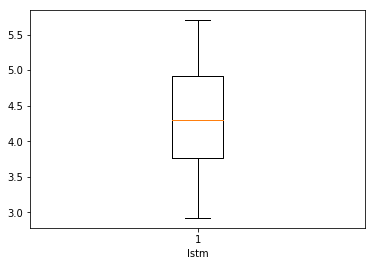

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(scores)
plt.xlabel('lstm')

In [79]:
from sklearn import metrics

maex = metrics.mean_absolute_error(actual['x'],actual['a'])
maey= metrics.mean_absolute_error(actual['y'],actual['b'])
maeauto = (maex + maey)/2

In [80]:
msex = metrics.mean_squared_error(actual['x'],actual['a'])
msey= metrics.mean_squared_error(actual['y'],actual['b'])
msemain = (msex + msey)/2

In [81]:
rmsex = np.sqrt(metrics.mean_squared_error(actual['x'],actual['a']))
rmsey= np.sqrt(metrics.mean_squared_error(actual['y'],actual['b']))
rmsemain = (rmsex + rmsey)/2

In [82]:
print("Mean absolute error : ", maeauto.mean())
print("Mean squared error : ", msemain.mean())
print("Root Mean squared error : ", rmsemain.mean())

Mean absolute error :  3.103008045825659
Mean squared error :  14.711034266612971
Root Mean squared error :  3.768090777973362


In [83]:
l2dists_mean, l2dists = l2_dist((preds[:, 0], preds[:, 1]), (Y_test[:, 0] , Y_test[:, 0]))
print(l2dists_mean)

3.9912631897989876


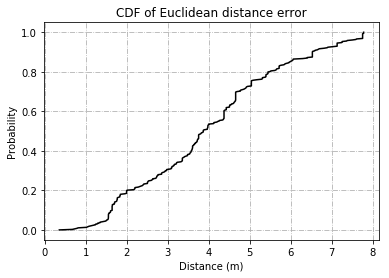

In [84]:
sortedl2_deep = np.sort(l2dists)
prob_deep = 1. * np.arange(len(sortedl2_deep))/(len(sortedl2_deep) - 1)
fig, ax = plt.subplots()
lg1, = ax.plot(sortedl2_deep, prob_deep, color='black')
plt.title('CDF of Euclidean distance error')
plt.xlabel('Distance (m)')
plt.ylabel('Probability')
plt.grid(True)
gridlines = ax.get_xgridlines() + ax.get_ygridlines()
for line in gridlines:
    line.set_linestyle('-.')

plt.savefig('Figure_CDF_error.png', dpi=300)
plt.show()
plt.close()